<a href="https://colab.research.google.com/github/Mobodot/Ineuron_DL_assignments/blob/main/POC_of_CNN_and_Pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
img_path = "/content/drive/MyDrive/car1.jpeg"


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [ ]:
def read_img(path, grayscale=True):
  img = cv2.imread(path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    return img
  try:
    cv2.imshow("display", img) # works on local pc
    return img
  except Exception as e:
    print(e)
    from google.colab.patches import cv2_imshow  # for colab
    cv2_imshow(img)
    return img

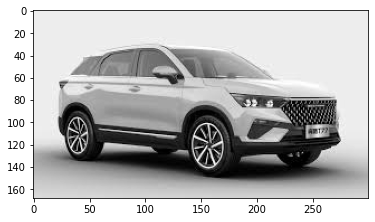

In [ ]:
car = read_img(path=img_path)


cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



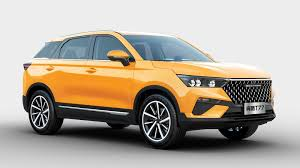

In [ ]:
color_car = read_img(path=img_path, grayscale=False)

In [ ]:
car.shape

(168, 300)

In [ ]:
color_car.shape

(168, 300, 3)

## Apply a single conv layer

In [ ]:
row, col = car.shape
batch = 1 # single image
ch = 1 # grayscale
reshaped_car_img = car.reshape(batch, row, col, ch)
reshaped_car_img.shape

(1, 168, 300, 1)

In [ ]:
input_shape = reshaped_car_img.shape[1:]
CONV_LAYER = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
3*3 + 1 # filter size + bias

10

In [ ]:
out = conv_model.predict(reshaped_car_img)

In [ ]:
out.shape

(1, 166, 298, 1)

In [ ]:
(168 - 3 + 2*(0))//1 + 1

166

In [ ]:
(300 - 3 + 2*(0))//1 + 1


298

TypeError: ignored

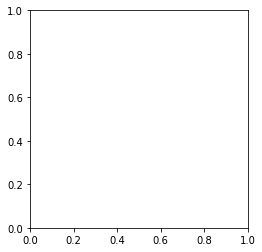

In [ ]:
plt.imshow(out, cmap="gray")

In [ ]:
row, col = out.shape[1:-1]

In [ ]:
reshape_out = out.reshape(row, col)
reshape_out.shape

(166, 298)

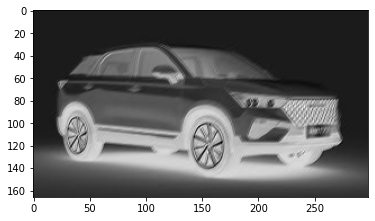

In [ ]:
plt.imshow(reshape_out, cmap="gray")

## For color image

In [ ]:
color_car.shape

(168, 300, 3)

In [ ]:
# (1, r, c, ch)
row, col, ch = color_car.shape
color_car_reshaped = color_car.reshape(1, row, col, ch)
color_car_reshaped.shape

(1, 168, 300, 3)

In [ ]:
input_shape = color_car_reshaped.shape[1:]
CONV_LAYER = [
    tf.keras.layers.Conv2D(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=input_shape)
]

conv_model = tf.keras.Sequential(CONV_LAYER)
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
out = conv_model.predict(color_car_reshaped)

In [ ]:
out.shape

(1, 166, 298, 1)

In [ ]:
(168 - 3 + 2*0)//1 + 1

166

In [ ]:
(300 - 3 + 2*0)//1 + 1

298

In [ ]:
row, col = out.shape[1:-1]

In [ ]:
reshape_out = out.reshape(row, col)
reshape_out.shape

(166, 298)

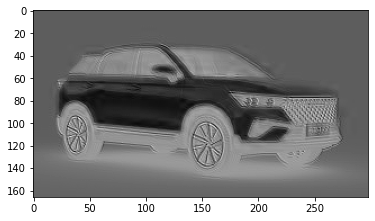

In [ ]:
plt.imshow(reshape_out, cmap="gray")


## 5 filters

In [ ]:
def reshaping_in(img, grayscale=True):
  if grayscale:
    row, col = img.shape
    img = img.reshape(1, row, col, 1) # grayscale
    return img
  row, col, ch = img.shape
  color_img = img.reshape(1, row, col, ch)
  return color_img

In [ ]:
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), input_shape=None, padding="valid"):
  
  CONV_LAYER = [
      
      tf.keras.layers.Conv2D(
          filters=1, 
          kernel_size=(3,3), 
          strides=(1,1), 
          input_shape=input_shape)
  ]

  conv_model = tf.keras.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [ ]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _, row, col, channels = out.shape
    reshape_out = out.reshape(row, col, channels)
    for channel in range(channels):
      plt.imshow(reshape_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    raise e

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



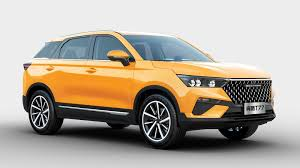

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 1)


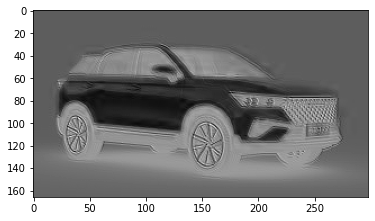

In [ ]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=1, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, conv_model)

cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow



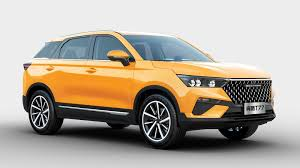

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 1)


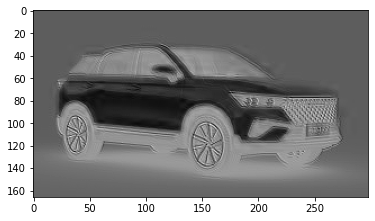

In [ ]:
img = read_img(img_path, grayscale=False)
input_img = reshaping_in(img, grayscale=False)
model = get_conv_model(filters=5, 
                       kernel_size=(3,3), 
                       strides=(1,1), 
                       input_shape=input_img.shape[1:], 
                       padding="valid")

apply_conv_model_and_visualize(input_img, conv_model)

In [ ]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  reshaped_img = reshaping_in(img)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,
                                            strides=strides)
  result = pooling_layer(reshaped_img)
  return result

In [ ]:
result = max_pooling(img)

In [ ]:
def plot_pooling(result):
  _, row, col, _ = result.shape
  reshape_img = tf.reshape(result, (row, col))
  plt.imshow(reshape_img, cmap="gray")

# Fast Track POC of CNN and Pooling

In [ ]:
img_path = "/content/drive/MyDrive/car1.jpeg"


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

In [ ]:
from google.colab.patches import cv2_imshow

def read_img(path, grayscale=True):
  img = cv2.imread(img_path)
  if grayscale:
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(img, cmap="gray")
    return img
  cv2_imshow(img)
  return img

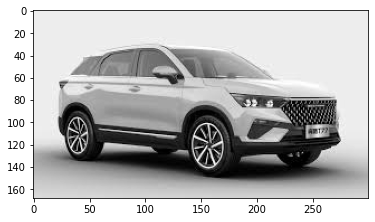

In [ ]:
car = read_img(img_path,)

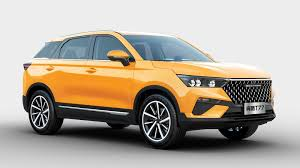

In [ ]:
color_car = read_img(img_path, grayscale=False)

In [ ]:
car.shape

(168, 300)

In [ ]:
color_car.shape

(168, 300, 3)

### Conv for grayscale images

In [ ]:
row,col = car.shape
car = car.reshape(1,row,col,1) # grayscale
# color_car = color_car.reshape(1,row,col,3) # color car
car.shape, color_car.shape

((1, 168, 300, 1), (168, 300, 3))

In [ ]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    input_shape=car.shape[1:],
                                    padding="valid")]

conv_model = tf.keras.models.Sequential(CONV_LAYER) 
conv_model.summary()                          

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 298, 1)       10        
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


In [ ]:
out = conv_model.predict(car)
out.shape

(1, 166, 298, 1)

In [ ]:
_,row,col,_ = out.shape
reshape_out = out.reshape(row,col)

In [ ]:
reshape_out.shape

(166, 298)

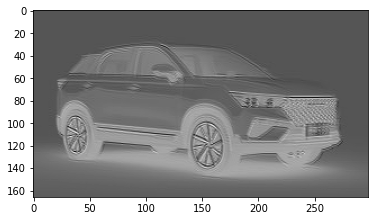

In [ ]:
plt.imshow(reshape_out, cmap="gray")

### Conv for colored images

In [ ]:
row,col,depth = color_car.shape
# car = car.reshape(1,row,col,1) # grayscale
color_car = color_car.reshape(1,row,col,depth) # color car
car.shape, color_car.shape

((1, 168, 300, 1), (1, 168, 300, 3))

In [ ]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=1,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    input_shape=color_car.shape[1:],
                                    padding="valid")]

conv_model = tf.keras.models.Sequential(CONV_LAYER) 
conv_model.summary()                          

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 166, 298, 1)       28        
                                                                 
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [ ]:
out = conv_model.predict(color_car)

In [ ]:
out.shape

(1, 166, 298, 1)

In [ ]:
_,row,col,_ = out.shape
reshape_out = out.reshape(row,col)

In [ ]:
reshape_out.shape

(166, 298)

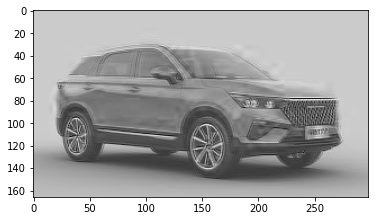

In [ ]:
plt.imshow(reshape_out,cmap="gray")

In [ ]:
color_car.shape

(1, 168, 300, 3)

In [ ]:
CONV_LAYER = [tf.keras.layers.Conv2D(filters=5,
                                    kernel_size=(3,3),
                                    strides=(1,1),
                                    input_shape=color_car.shape[1:],
                                    padding="valid")]

conv_model = tf.keras.models.Sequential(CONV_LAYER) 
conv_model.summary()       

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________


In [ ]:
color_car.shape

(1, 168, 300, 3)

In [ ]:
out = conv_model.predict(color_car)
out.shape

(1, 166, 298, 5)

### Displaying all five channels.

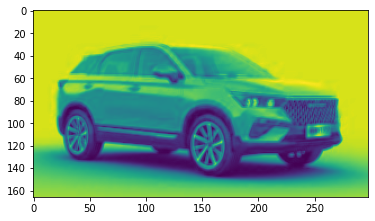

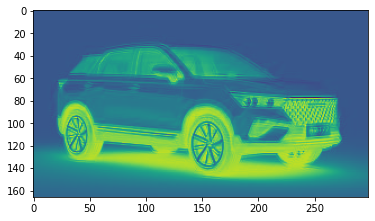

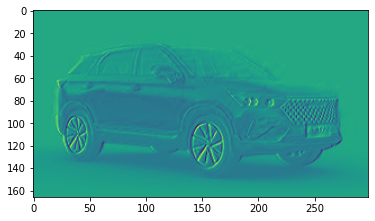

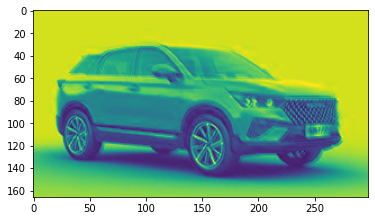

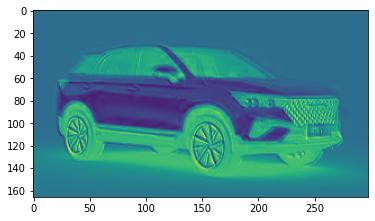

In [ ]:
_,row,col,channels = out.shape
reshape_out = out.reshape(row,col,channels)

for channel in range(channels):
  plt.imshow(reshape_out[:,:,channel])
  plt.show()

In [ ]:
out.shape

(1, 166, 298, 5)

In [ ]:
out[:,:,1].shape

(1, 166, 5)

In [ ]:
def reshape_inp(img, grayscale=True):
  if grayscale:
    row,col = img.shape
    img = img.reshape(1,row,col,1)
    return img
  row,col,channels = img.shape
  color_img = img.reshape(1,row,col,channels)
  return color_img

In [ ]:
def get_conv_model(filters=1, kernel_size=(3,3), strides=(1,1), padding="valid", input_shape=None):
  CONV_LAYER = [tf.keras.layers.Conv2D(filters=filters,
                                   kernel_size=(3,3),
                                   strides=(1,1),
                                   padding=padding,
                                   input_shape=input_shape)]

  conv_model = tf.keras.models.Sequential(CONV_LAYER)
  conv_model.summary()
  return conv_model

In [ ]:
def apply_conv_model_and_visualize(img, conv_model):
  try:
    out = conv_model.predict(img)
    print(out.shape)
    _,row,col,channels = out.shape
    reshaped_out = out.reshape(row,col,channels)
    for channel in range(channels):
      plt.imshow(reshaped_out[:,:,channel], cmap="gray")
      plt.show()
  except Exception as e:
    raise e

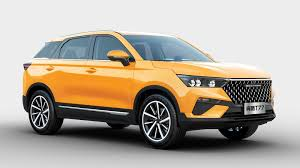

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 168, 300, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
(1, 168, 300, 5)


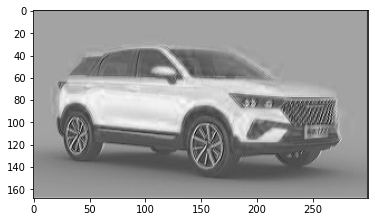

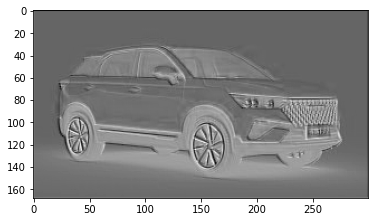

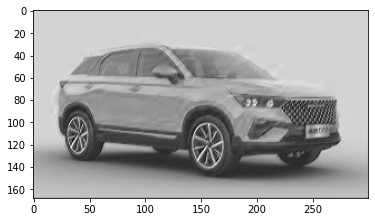

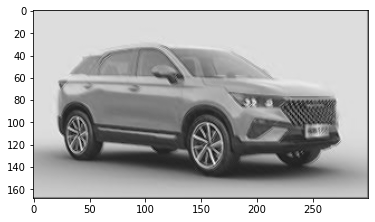

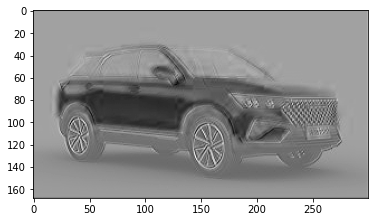

In [ ]:
img = read_img(img_path, grayscale=False)
input_img = reshape_inp(img, grayscale=False)
model = get_conv_model(
    filters=5, 
    kernel_size=(3,3), 
    strides=(1,2), 
    padding="same", 
    input_shape=input_img.shape[1:])

apply_conv_model_and_visualize(input_img, model)

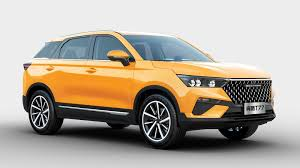

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 166, 298, 5)       140       
                                                                 
Total params: 140
Trainable params: 140
Non-trainable params: 0
_________________________________________________________________
(1, 166, 298, 5)


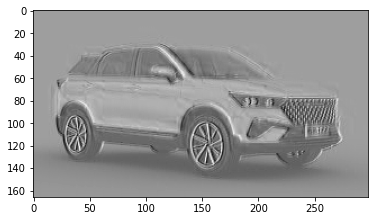

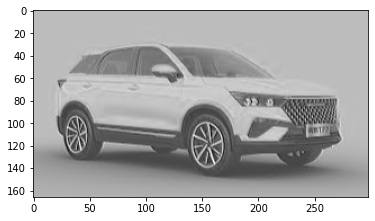

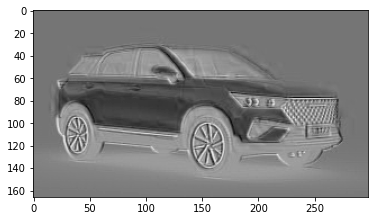

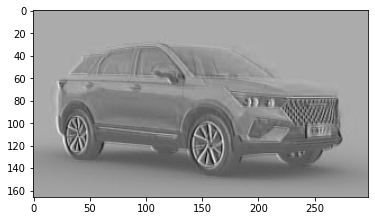

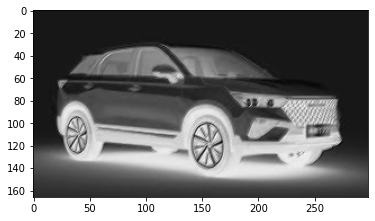

In [ ]:
img = read_img(img_path, grayscale=False)
input_img = reshape_inp(img, grayscale=False)
model = get_conv_model(
    filters=5, 
    kernel_size=(3,3), 
    strides=(1,1), 
    padding="valid", 
    input_shape=input_img.shape[1:])

apply_conv_model_and_visualize(input_img, model)

In [ ]:
def max_pooling(img, pool_size=(2,2), strides=(2,2)):
  # print("hello", img.shape)
  reshaped_img = reshape_inp(img)
  print(reshaped_img.shape)
  pooling_layer = tf.keras.layers.MaxPool2D(pool_size=pool_size,
                                            strides=strides)
  result = pooling_layer(reshaped_img)
  # print(result.shape)
  return result

(1, 168, 300, 1)


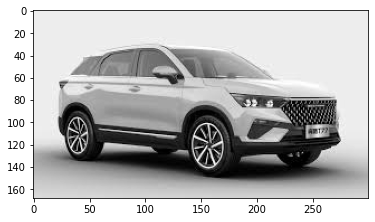

In [ ]:
img = read_img(img_path)

result = max_pooling(img)

In [ ]:
result.shape

TensorShape([1, 84, 150, 1])

In [ ]:
def plot_pooling(result):
  _,row,col,_ = result.shape
  reshape_img = tf.reshape(result, (row,col))
  plt.imshow(reshape_img, cmap="gray")

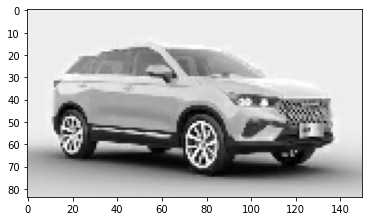

In [ ]:
plot_pooling(result)

In [ ]:
_,row,col,_  = result.shape

reshape = tf.reshape(result, (row,col))

In [ ]:
reshape.shape

TensorShape([84, 150])

In [ ]:
result = max_pooling(reshape.numpy())
result.shape

(1, 84, 150, 1)


TensorShape([1, 42, 75, 1])

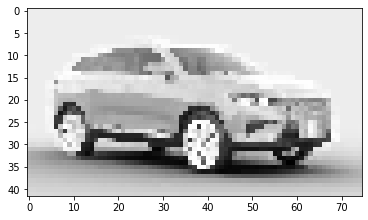

In [ ]:
plot_pooling(result)

# Global Average pooling

In [ ]:
def gap_pooling(img, grayscale):
  # print("hello", img.shape)
  reshaped_img = reshape_inp(img, grayscale)
  print(reshaped_img.shape)
  pooling_layer = tf.keras.layers.GlobalAvgPool2D()
  result = pooling_layer(reshaped_img)
  # print(result.shape)
  return result

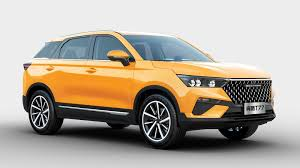

(168, 300, 3)
(1, 168, 300, 3)
(1, 3)
tf.Tensor([[153 166 174]], shape=(1, 3), dtype=uint8)


In [ ]:
img = read_img(img_path, grayscale=False)
print(img.shape)
result = gap_pooling(img, grayscale=False)
print(result.shape)
print(result)